<a href="https://colab.research.google.com/github/prachigupta2006/feature-engineering/blob/main/function_transformation_titanic_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [33]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [34]:
df= pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


we are only taking the above three columns

In [35]:
df.isnull()

,Survived,Age,Fare
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,False,True,False
889,False,False,False


In [36]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [37]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Train test split

In [38]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


# age and fare distribution without transformation

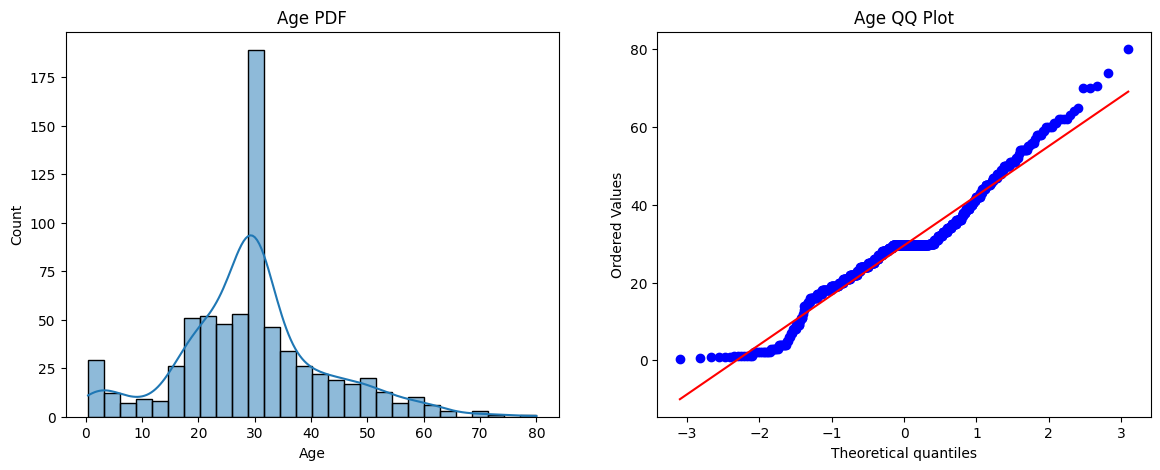

In [41]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.histplot(X_train['Age'],kde=True)
plt.title('Age PDF')   #pdf=probability dnsity function

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

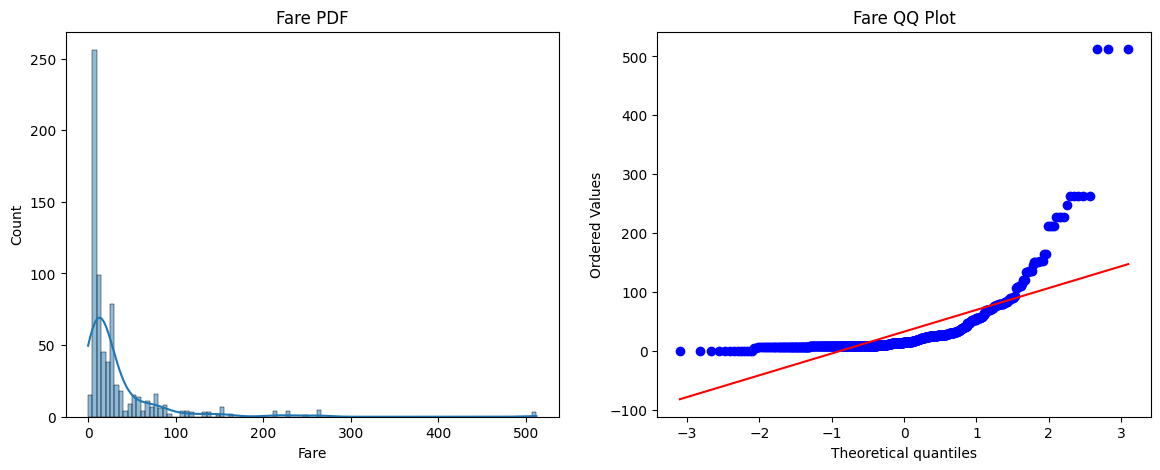

In [42]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.title('Fare PDF')   #pdf=probability dnsity function

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

# MACHINE LEARNING MODELS

In [43]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [44]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("accuracy LR",accuracy_score(y_test,y_pred))
print("accuracy DT",accuracy_score(y_test,y_pred2))

accuracy LR 0.6480446927374302
accuracy DT 0.6536312849162011


# APPLYING FUNCTION TRANSFORMER

In [45]:
trf = FunctionTransformer(func=np.log1p)

In [46]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [47]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [48]:
clf.fit(X_train_trf,y_train)
clf2.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)
y_pred1 = clf2.predict(X_test_trf)

print("accuracy LR",accuracy_score(y_test,y_pred))
print("accuracy DT",accuracy_score(y_test,y_pred1))

accuracy LR 0.6815642458100558
accuracy DT 0.6815642458100558


# CROSS VALIDATION

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('Logistic Regression Accuracy: ', cross_val_score(clf, X_transformed, y, cv=5).mean())
print('Decision Tree Accuracy: ', cross_val_score(clf2, X_transformed, y, cv=5).mean())

Logistic Regression Accuracy:  0.6780114242671521
Decision Tree Accuracy:  0.6442345113301111


# Age before and after transformation

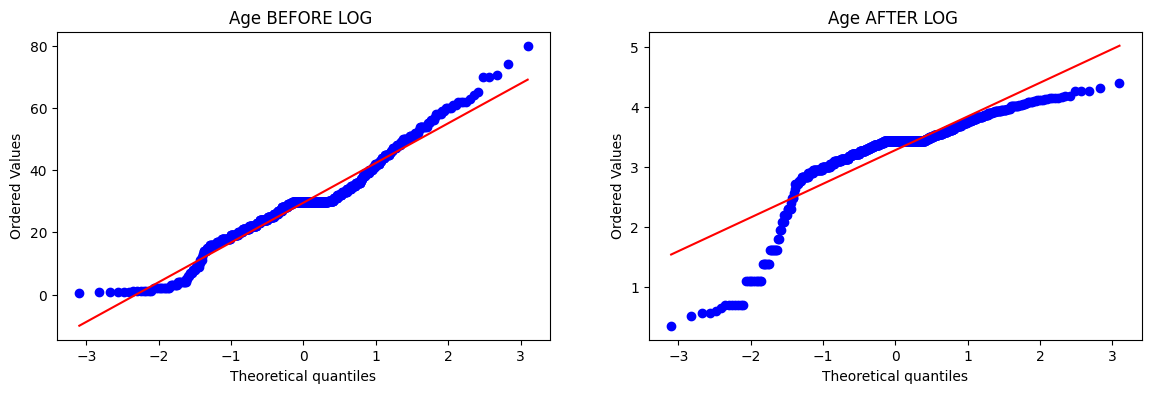

In [51]:
plt.figure(figsize=(14,4))


plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age BEFORE LOG ')

plt.subplot(122)
stats.probplot(X_train_trf['Age'], dist="norm", plot=plt)
plt.title('Age AFTER LOG ')

plt.show()

# Fare before and after transformation

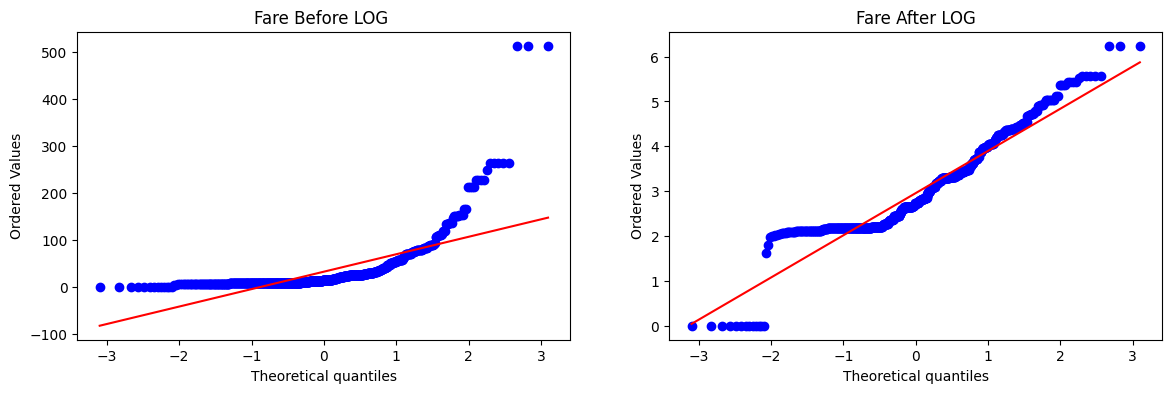

In [52]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before LOG ')


plt.subplot(122)
stats.probplot(X_train_trf['Fare'], dist="norm", plot=plt)
plt.title('Fare After LOG')

plt.show()

# cube root tansformer

In [53]:
tnf = FunctionTransformer(func=np.cbrt)

In [54]:
X_train_trf2 = tnf.fit_transform(X_train)
X_test_trf2 = tnf.transform(X_test)

# ml model and fitting data

In [55]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_trf2,y_train)
clf2.fit(X_train_trf2,y_train)

DecisionTreeClassifier()

# ACCURACY AND PREDICTION

In [56]:
y_pred = clf.predict(X_test_trf2)
y_pred1 = clf2.predict(X_test_trf2)

print("accuracy LR",accuracy_score(y_test,y_pred))
print("accuracy DT",accuracy_score(y_test,y_pred1))

accuracy LR 0.6871508379888268
accuracy DT 0.6927374301675978


CROSS VALIDATION

In [31]:
X_trf= trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('Logistic Regression Accuracy: ', cross_val_score(clf, X_trf, y, cv=5).mean())
print('Decision Tree Accuracy: ', cross_val_score(clf2, X_trf, y, cv=5).mean())

Logistic Regression Accuracy:  0.6780114242671521
Decision Tree Accuracy:  0.6475990207771012


# age after transformation

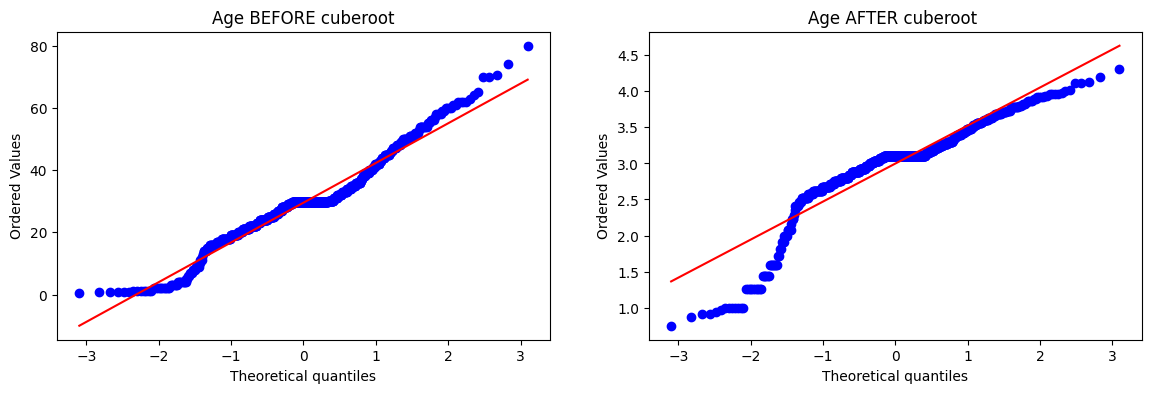

In [57]:
plt.figure(figsize=(14,4))


plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age BEFORE cuberoot')

plt.subplot(122)
stats.probplot(X_train_trf2['Age'], dist="norm", plot=plt)
plt.title('Age AFTER cuberoot ')

plt.show()